## <font color='blue'>Projeto 2</font>

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

![DSA](imagens/vendas.png)

In [56]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.13.6


In [57]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [3]:
# Carrega o dataset
#df_dsa = pd.read_csv('dados/dataset.csv')
df = pd.read_csv('dados/Sample-Superstore.csv')

In [4]:
# Shape (tamanho)
df.shape

(9700, 11)

In [5]:
#Cinco primeiras linhas
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [6]:
# Cinco últimos linhas
df.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [7]:
# Nome das colunas do conjunto de dados
df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [8]:
# Verificando o tipo de dado de cada coluna
df.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [9]:
# Resumo estatístico da coluna com o valor de venda
df['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [10]:
# Verificando se há registros duplicados
df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [11]:
# Verificando de há valores ausentes
df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [12]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [13]:
#Verificar as categorias únicas da coluna e a contagem de ocorrências de cada uma.
df['Categoria'].value_counts()

Categoria
Office Supplies    5851
Furniture          2055
Technology         1794
Name: count, dtype: int64

In [14]:
#Primeiro filtramos o dataframe com os registros da categoria que desejamos
df_f1 = df[df['Categoria'] == 'Office Supplies']

#Em seguida agrupamos por cidade e calculamos o total de valor venda
df_f1_total = df_f1.groupby('Cidade')['Valor_Venda'].sum()

# Encontra a cidade com maior valor de venda
cidade_maior_venda = df_f1_total.idxmax()

print(f"A cidade com maior valor de venda em 'Office Supplies' é: {cidade_maior_venda}.")

#Para conferir o resultado
df_f1_total.sort_values(ascending=False)

A cidade com maior valor de venda em 'Office Supplies' é: New York City.


Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [15]:
#Calcularmos o total de vendas para cada data de período
df_f2 = df.groupby('Data_Pedido')['Valor_Venda'].sum()

#Visualizar as cinco primeiras
df_f2.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

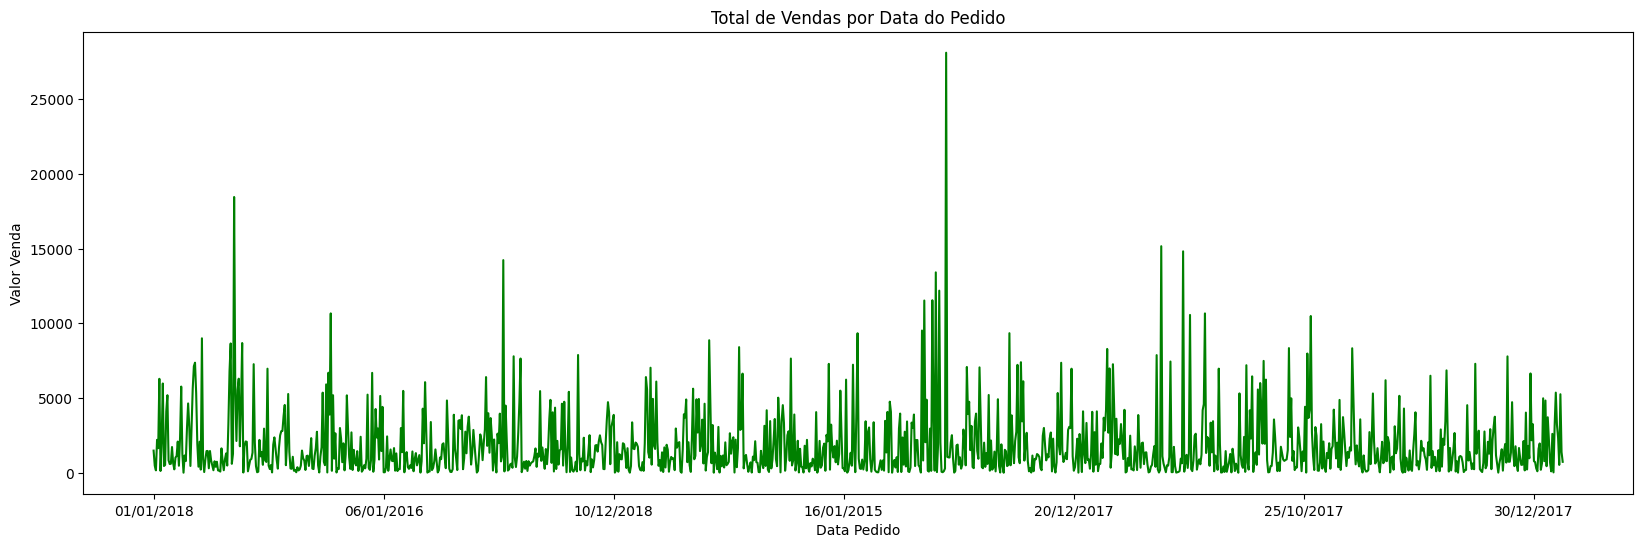

In [16]:
#Pandas
#Plot
plt.figure(figsize=(20,6))
df_f2.plot(x='Data_Pedido',y='Valor_Venda',color='g')
plt.xlabel('Data Pedido')
plt.ylabel('Valor Venda')
plt.title('Total de Vendas por Data do Pedido')
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [17]:
#Agrupamento por estado e claculamaos o total de vendas
df_f3 = df.groupby('Estado')['Valor_Venda'].sum().reset_index()

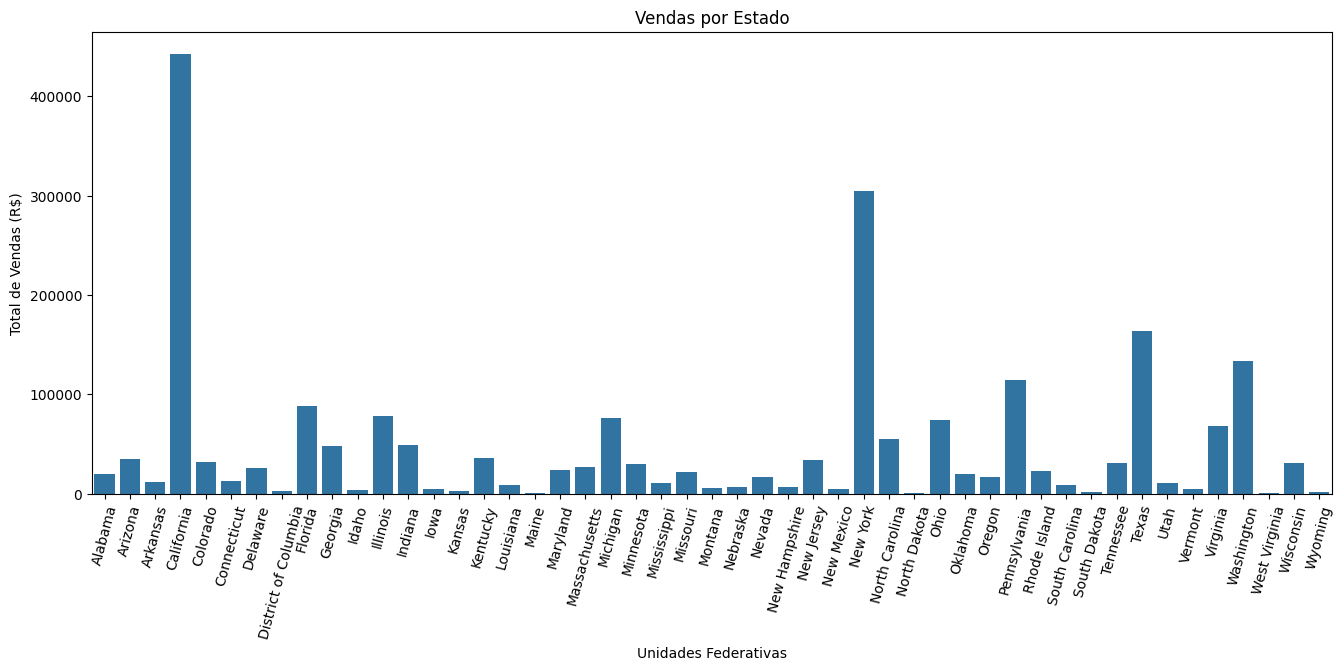

In [18]:
plt.figure(figsize=(16,6))
sns.barplot(data=df_f3,y='Valor_Venda',x='Estado').set(
    title='Vendas por Estado',
    xlabel='Unidades Federativas',
    ylabel='Total de Vendas (R$)'
)
plt.xticks(rotation=75)
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [19]:
#Agruparmos por cidade, calculamos o total de vendas e ordenamos listando somente os 10 primeiros registros
df_f4 = df.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda',ascending=False).head(10)

In [20]:
df_f4

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


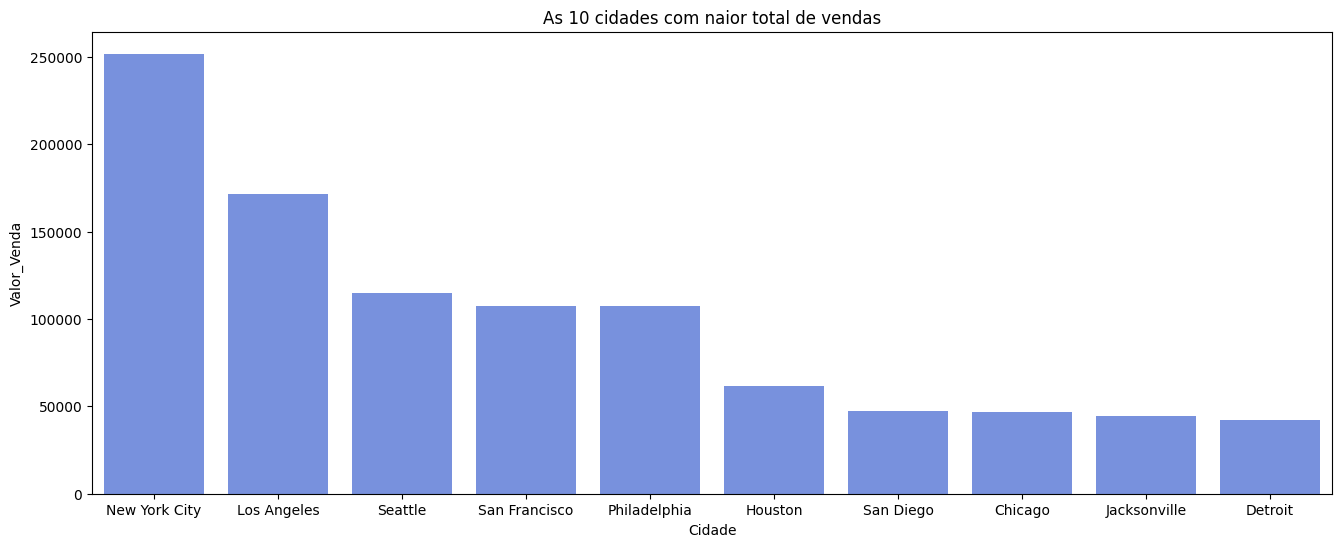

In [21]:
#plot
plt.figure(figsize=(16,6))
sns.set_palette('coolwarm')
sns.barplot(data=df_f4,
            y='Valor_Venda',
            x='Cidade').set(title='As 10 cidades com naior total de vendas')
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [22]:
#Agruparmos por cidade, calculamos o total de vendas e ordenamos listando
df_f5 = df.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda',ascending=False)

#### Exemplo: forçar Pandas a mostrar números sem notação científica
pd.options.display.float_format = '{:,.2f}'.format

In [23]:
df_f5.head()

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


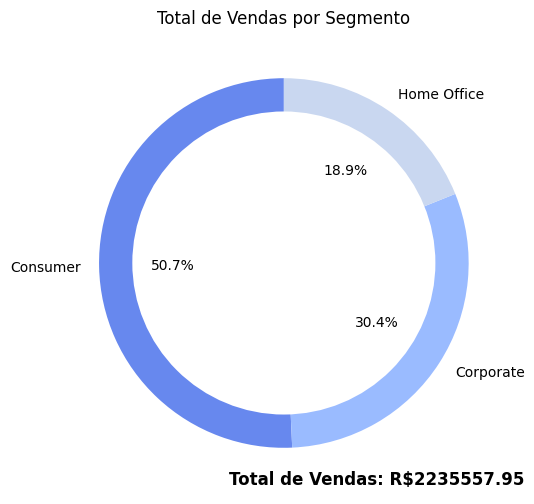

In [24]:
#plot

# Total de vendas
total_vendas = df_f5['Valor_Venda'].sum()

# tamanho da figura
plt.figure(figsize=(16,6))

#gráfico de pizza
plt.pie(df_f5['Valor_Venda'],
        labels=df_f5['Segmento'],
        startangle=90,
        autopct='%1.1f%%')

#alteração do gráfico
centro_circulo = plt.Circle((0,0),0.82,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centro_circulo)

#Label  e anotações
plt.annotate(text=f'Total de Vendas: R${total_vendas:.2f}',
             xy=(0.5,-1.2),
             fontsize=12,
             weight='bold',
             ha='center')
plt.title('Total de Vendas por Segmento')
plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [25]:
df.head(2)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94


In [26]:
#Convertemos a coluna de data_venda para tipo datetime para obter o formato adequado
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'],dayfirst=True)

In [27]:
df.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [28]:
#Extraímos o ano criando nova variável
df['Ano'] = df['Data_Pedido'].dt.year

In [29]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [30]:
df_f6 = df.groupby(['Ano','Segmento'])['Valor_Venda'].sum()

In [31]:
display(df_f6)

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64

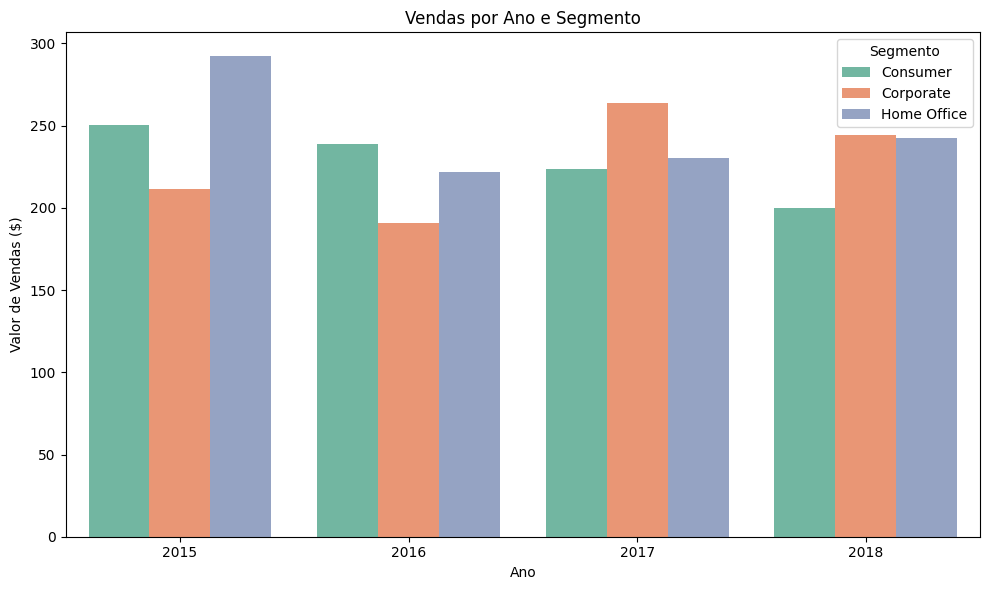

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,
            x='Ano',
            y='Valor_Venda',
            hue='Segmento',
            palette='Set2',
            errorbar=None).set(
    title='Vendas por Ano e Segmento',
    xlabel='Ano',
    ylabel='Valor de Vendas ($)'
)

plt.tight_layout()
plt.show()

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

np.where é uma função que retorna elementos com base em uma condição.
Você passa três argumentos:

>np.where(condição, valor_se_verdadeiro, valor_se_falso)
>>condição → teste lógico (True/False) aplicado a cada elemento.

valor_se_verdadeiro → o que retorna quando a condição é verdadeira.

valor_se_falso → o que retorna quando a condição é falsa.

In [33]:
# Cria uma nova coluna de acordo com a regra definida acima
df['Desconto'] = np.where(df['Valor_Venda']>1000,0.15,0.1)

In [34]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1


In [35]:
# Total por cada valor da variável
df['Desconto'].value_counts()

Desconto
0.10    9243
0.15     457
Name: count, dtype: int64

In [36]:
print('No Total 457 Vendas Receberiam Desconto de 15%.')

No Total 457 Vendas Receberiam Desconto de 15%.


## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [37]:
# Criamos uma coluna calculando o valor de venda menos o desconto
df['Valor_Venda_Desconto'] = np.where(df['Valor_Venda']>1000,df['Valor_Venda']*0.85,df['Valor_Venda']*0.9)


In [38]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120


In [39]:
#Filtrando as vendas antes do desconto de 15%
antes_desconto = df.loc[df['Desconto']==0.15,'Valor_Venda']

In [40]:
#Filtrando as vendas depois do desconto de 15%
depois_desconto = df.loc[df['Desconto']==0.15,'Valor_Venda_Desconto']

In [41]:
#Calcula a média das vendas antes do desconto de 15%
media_antes_desconto = antes_desconto.mean()

In [42]:
#Calcula a média das vendas depois do desconto de 15%
media_depois_desconto = depois_desconto.mean()

In [43]:
print(f'A média de vendas antes do desconto é de R${media_antes_desconto:.2f}.')

A média de vendas antes do desconto é de R$2116.81.


In [44]:
print(f'A média de vendas depois do desconto é de R${media_depois_desconto:.2f}.')

A média de vendas depois do desconto é de R$1799.29.


## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [45]:
# Extraímos o mês e gravamos em uma nova variável
df['Mês'] = df['Data_Pedido'].dt.month

In [46]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto,Mês
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,10


In [47]:
#Agrupamos por ano, mês e segmento e calculamos estatísticas de agregação
df_f9 = df.groupby(['Ano','Mês','Segmento'])['Valor_Venda'].agg(soma='sum',media='mean',mediana='median')

In [48]:
df_f9

soma       media  mediana
Ano  Mês Segmento                                    
2015 1   Consumer      6896.6290  146.736787   36.440
         Corporate     1701.5280  130.886769   51.940
         Home Office   5607.5500  329.855882   62.820
     2   Consumer      3167.8540  117.327926   22.776
         Corporate      623.1180   69.235333   62.310
...                          ...         ...      ...
2018 11  Corporate    44357.9862  341.215278   79.530
         Home Office  24009.3840  247.519423   56.560
     12  Consumer     48107.4558  183.616244   52.533
         Corporate    20524.4320  153.167403   46.460
         Home Office  13022.3910  224.523983   49.260

[144 rows x 3 columns]

In [49]:
#Vamos extrair os níveis
anos = df_f9.index.get_level_values(0)
meses = df_f9.index.get_level_values(1)
segmentos = df_f9.index.get_level_values(2)

<Figure size 1200x600 with 0 Axes>

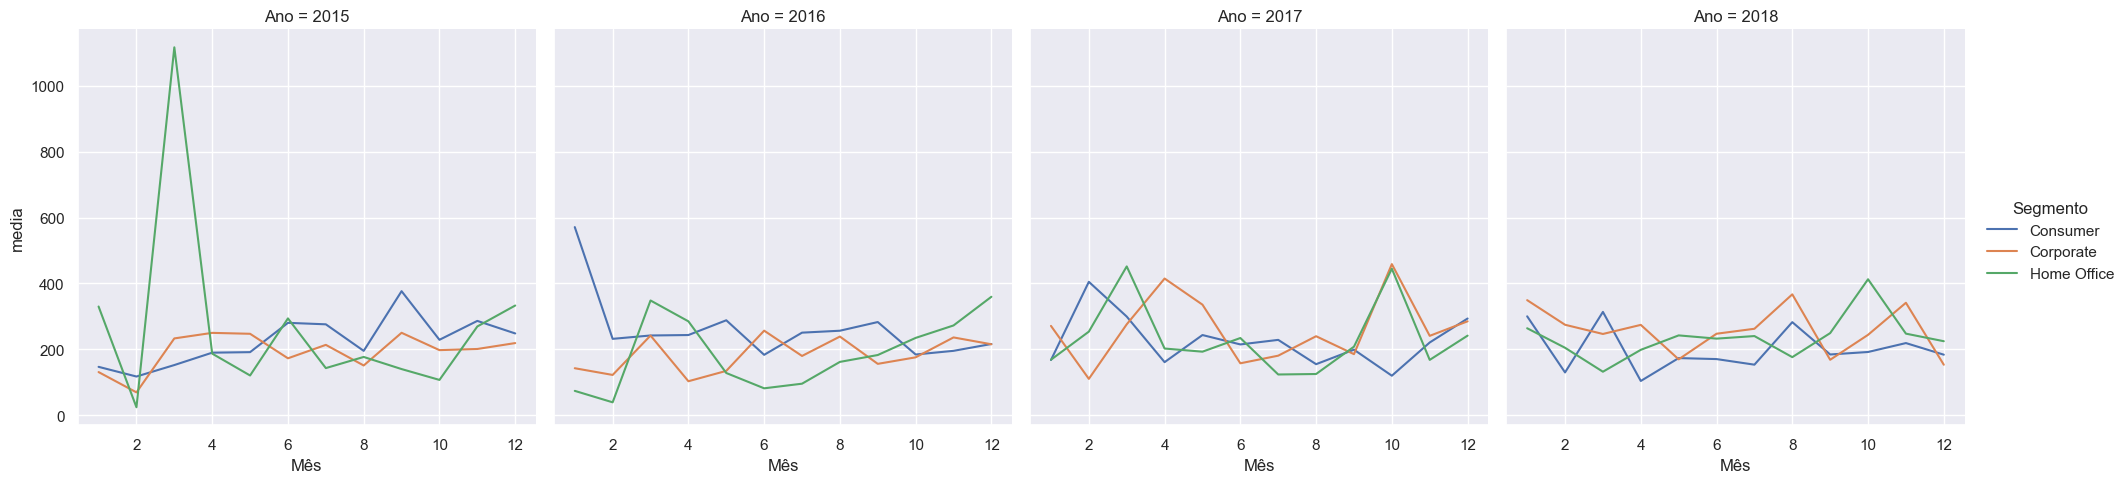

In [50]:
#plot
plt.figure(figsize=(12,6))
sns.set()
figl = sns.relplot(kind='line',
                   data=df_f9,
                   y='media',
                   x=meses,
                   hue=segmentos,
                   col=anos,
                   col_wrap=4)
plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [51]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto,Mês
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,10


# Fim